# NLP With Hotel Review

We are tasked with helping Hotel Management Inc. better understand what qualities of a hotel stay contribute to greater customer satisfaction and higher ratings.

## Exploratory Data Analysis

In [1]:
#Import Liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
df = pd.read_csv('Hotel_Reviews.csv') #The CSV is in Root Directory

# Display basic information and the first few rows of the dataset
df.head()

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,1,0,0,0,0,0,1,3
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,...,0,0,1,0,0,0,0,0,1,3
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,...,0,1,1,0,0,0,0,0,1,2


In [2]:
df.shape
#Verify the count of columns and rows.

(515738, 30)

In [3]:
df.info
#Checking Details about Dataframe

<bound method DataFrame.info of         Unnamed: 0  Additional_Number_of_Scoring  Average_Score  \
0                0                           194            7.7   
1                1                           194            7.7   
2                2                           194            7.7   
3                3                           194            7.7   
4                4                           194            7.7   
...            ...                           ...            ...   
515733      515733                           168            8.1   
515734      515734                           168            8.1   
515735      515735                           168            8.1   
515736      515736                           168            8.1   
515737      515737                           168            8.1   

                                          Negative_Review  \
0        I am so angry that i made this post available...   
1                                        

In [4]:
#Checking Null Values and Removing Redunant Data. 
df.isnull().sum()

Unnamed: 0                                    0
Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                

In [5]:
#Removing Unnamed: 0 because it serves no purpose and is redundant
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.head()  #Unamed is removed

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2


In [7]:
df.describe() #To find out basic info about NUMERICAL features to understand their distribution.

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,...,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,0.570006,354.441932,49.432419,2.893479,...,0.068711,0.365121,0.110936,0.116627,0.508594,0.072143,0.116199,0.075502,0.810059,2.362122
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,0.495075,208.928124,3.460237,4.667477,...,0.252963,0.481465,0.314053,0.320976,0.499927,0.258725,0.320463,0.264199,0.392255,1.646808
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,-0.369758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,-0.143372,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,0.019886,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,1.000000,527.000000,51.516288,4.841163,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,16.429233,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


The summary provides clear insights into each row, but for those new to the concept, the standard deviation (std) row reveals the dispersion of values in each column. Given a mean of 0.570006 and a standard deviation of 0.00, it's notable that a standard deviation close to zero indicates tightly clustered values around the mean.

To provide further context, if the mean were 8.397487, a standard deviation of 0.548048 would be seen as relatively low. Whether a standard deviation is considered low or high depends on the specifics of the dataset. In this scenario, with a mean of 8.397487, a standard deviation of 0.548048 suggests the values are quite near to the mean.

Simply put, a smaller standard deviation signifies values closer to the mean, while a larger one suggests greater spread. Therefore, in this context, a standard deviation of 0.548048 is considered relatively low.

### Correlation Analysis

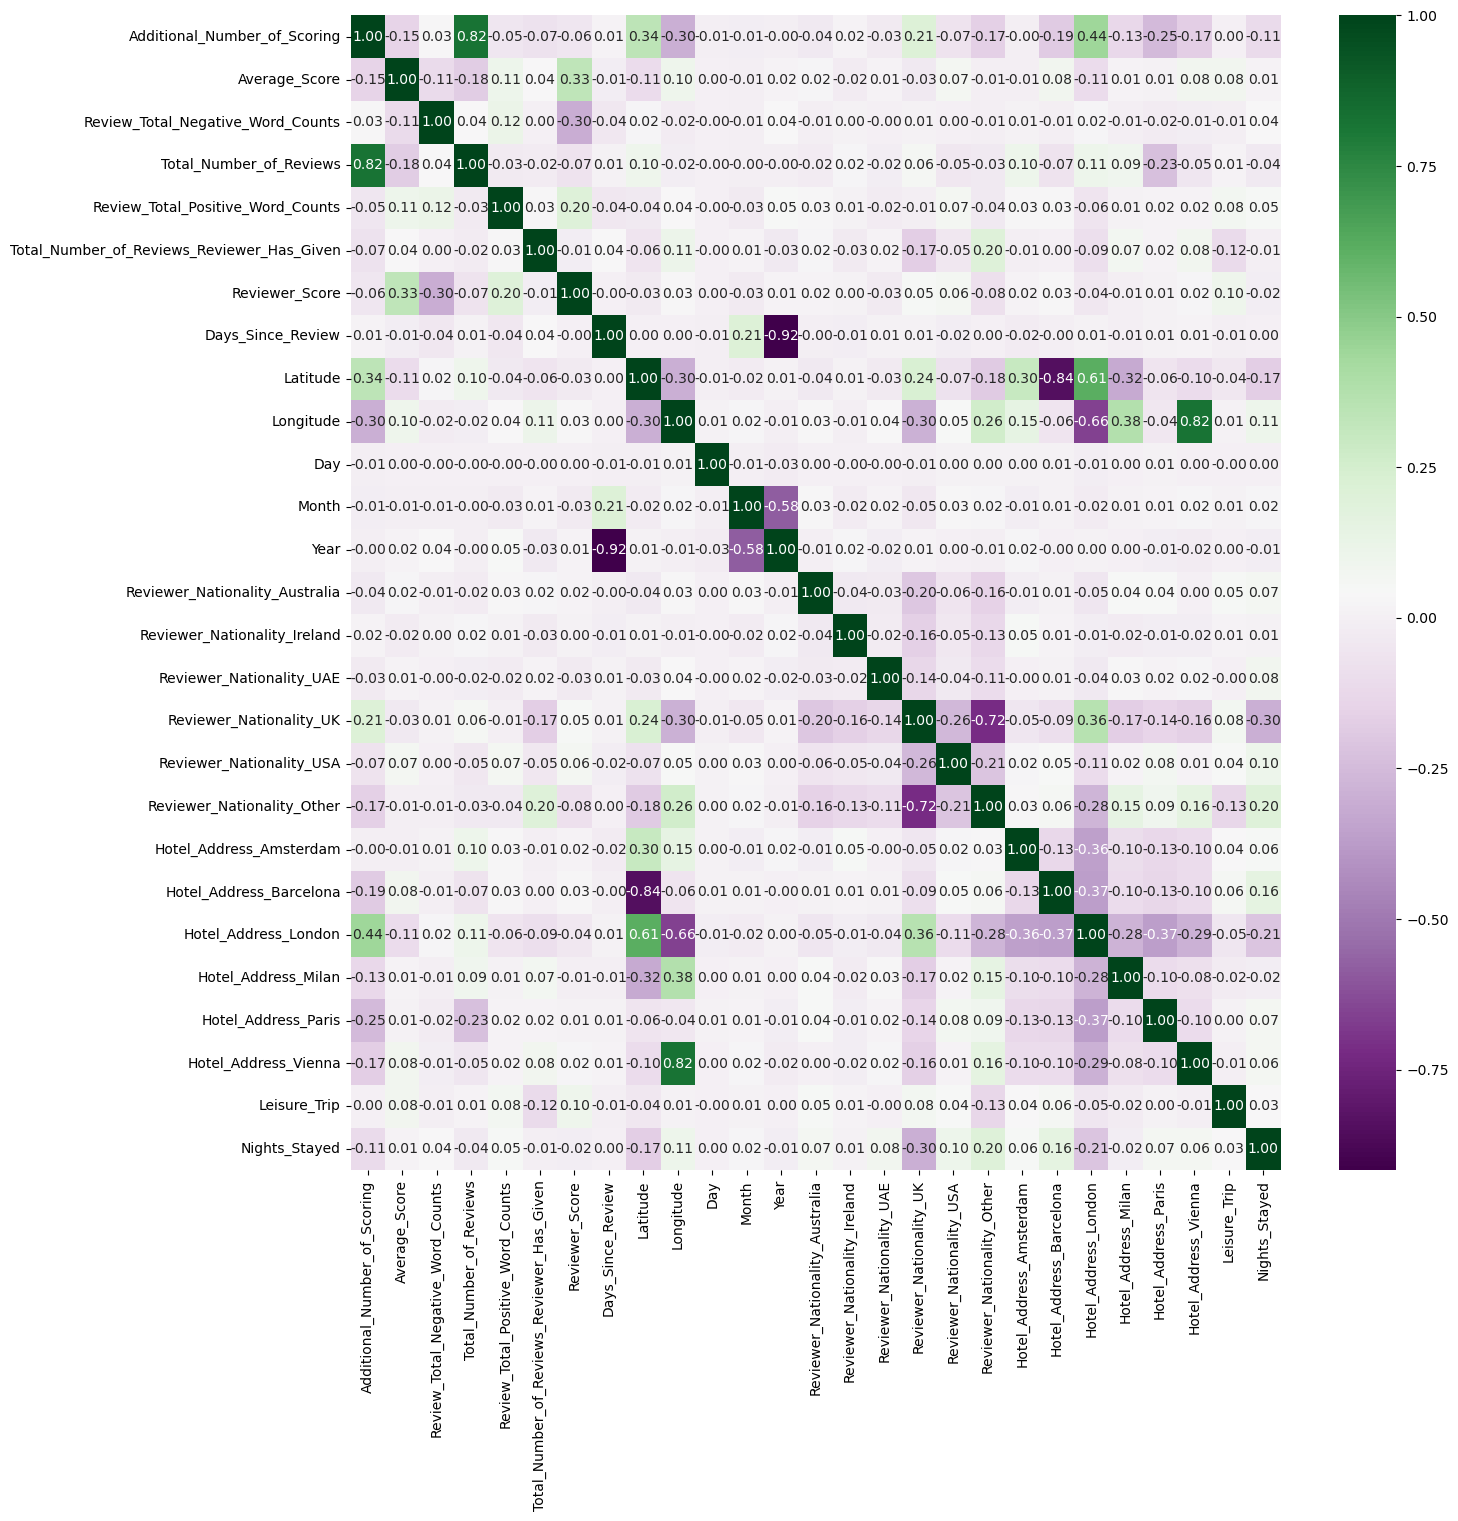

In [8]:
# Only the numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='PRGn')
plt.show()

Green squares indicate a positive correlation between variables, suggesting that as one variable increases, the other tends to increase as well. The intensity of the green color signifies the strength of this positive correlation.

Purple squares denote a negative correlation, implying that as one variable increases, the other tends to decrease. Darker shades of purple indicate a stronger negative correlation.

White squares typically represent no correlation, indicating little to no linear relationship between the variables.

### Distribution Analysis

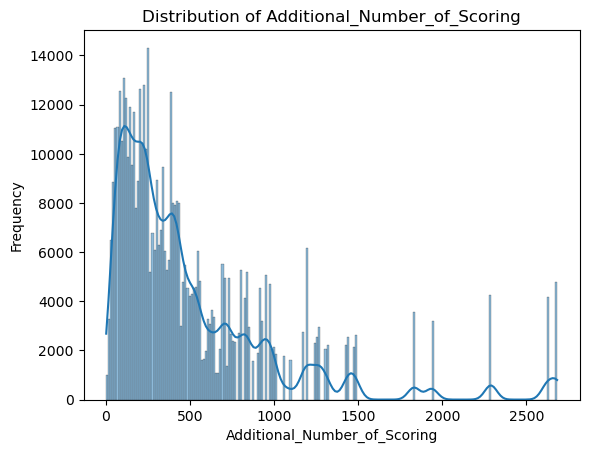

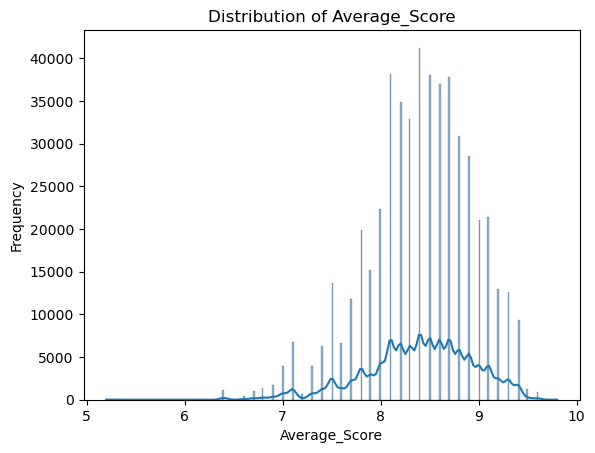

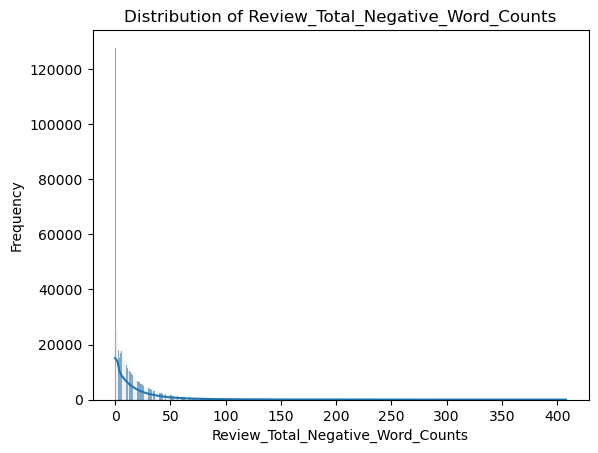

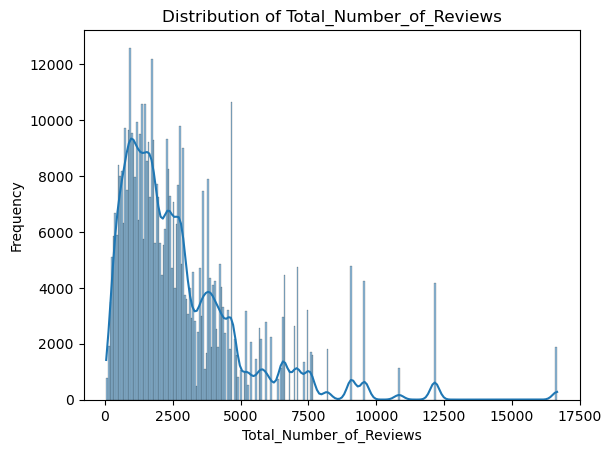

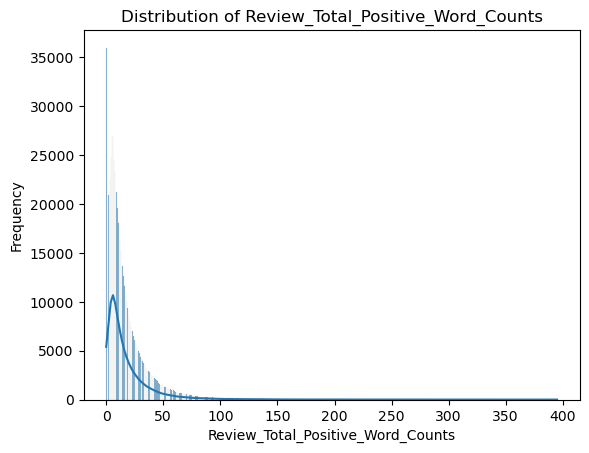

In [9]:
# Limiting the visualization to the first 5 numerical columns for better clarity
num_cols_to_visualize = 5  

# Selecting the initial 5 numerical columns for visualization
numerical_columns = [column for column in df.columns if df[column].dtype != 'object'][:num_cols_to_visualize]

# Visualizing the selected numerical columns
for column in numerical_columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Data Cleaning

In [10]:
df['Positive_Review'].head()

0     Only the park outside of the hotel was beauti...
1     No real complaints the hotel was great great ...
2     Location was good and staff were ok It is cut...
3     Great location in nice surroundings the bar a...
4      Amazing location and building Romantic setting 
Name: Positive_Review, dtype: object

In [11]:
df['Negative_Review'].head()

0     I am so angry that i made this post available...
1                                          No Negative
2     Rooms are nice but for elderly a bit difficul...
3     My room was dirty and I was afraid to walk ba...
4     You When I booked with your company on line y...
Name: Negative_Review, dtype: object

In [12]:
#Both of the Reviews have to many spaces and is not really useful. We need to clean it before we can use it.

In [14]:
# Function to clean text data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using list comprehension
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove non-alphanumeric characters and spaces
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    
    return text

In [15]:
df['Positive_Review'] = df['Positive_Review'].apply(clean_text)  #Cleaning the Postive Review
df['Positive_Review'].head()  #Postive review data set has been cleaned and looks unison.

0     only the park outside of the hotel was beauti...
1     no real complaints the hotel was great great ...
2     location was good and staff were ok it is cut...
3     great location in nice surroundings the bar a...
4      amazing location and building romantic setting 
Name: Positive_Review, dtype: object

In [16]:
df['Negative_Review'] = df['Negative_Review'].apply(clean_text)  #Cleaning the Negative Review
df['Negative_Review'].head()

0     i am so angry that i made this post available...
1                                          no negative
2     rooms are nice but for elderly a bit difficul...
3     my room was dirty and i was afraid to walk ba...
4     you when i booked with your company on line y...
Name: Negative_Review, dtype: object

### Preprocessing

In [17]:


# Separating features (X) and target (y) variables
X = df.drop('Reviewer_Score', axis=1)  # Features
y = df['Reviewer_Score']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### CountVectorizer - CountVectorizer converts a collection of text documents into a matrix where the rows represent the documents, and the columns represent the tokens

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# Importing CountVectorizer from the sklearn library
from sklearn.feature_extraction.text import CountVectorizer

# Creating CountVectorizer objects for positive and negative reviews with specified parameters
pos_vect = CountVectorizer(max_features=500, stop_words='english', min_df=10)
neg_vect = CountVectorizer(max_features=500, stop_words='english', min_df=10)

#We are using 'English because that is the only language relvant for us

In [20]:
# Transforming text into binary
pos_vect.fit(X_train['Positive_Review'])
pos_vect_xform_train_raw = pos_vect.transform(X_train['Positive_Review'])
pos_vect_xform_test_raw = pos_vect.transform(X_test['Positive_Review'])

In [21]:
# Transforming text into binary
neg_vect.fit(X_train['Negative_Review'])
neg_vect_xform_train_raw = neg_vect.transform(X_train['Negative_Review'])
neg_vect_xform_test_raw = neg_vect.transform(X_test['Negative_Review'])

In [22]:
# Creating new features for the DataFrame
# Transforming the binary vectors into DataFrame format for positive reviews
pos_vect_train_df = pd.DataFrame(pos_vect_xform_train_raw.toarray(), columns=pos_vect.get_feature_names_out())
pos_vect_test_df = pd.DataFrame(pos_vect_xform_test_raw.toarray(), columns=pos_vect.get_feature_names_out())

# Transforming the binary vectors into DataFrame format for negative reviews
neg_vect_train_df = pd.DataFrame(neg_vect_xform_train_raw.toarray(), columns=neg_vect.get_feature_names_out())
neg_vect_test_df = pd.DataFrame(neg_vect_xform_test_raw.toarray(), columns=neg_vect.get_feature_names_out())

In [23]:
#Making sure it works
pos_vect_test_df.columns 
neg_vect_test_df.columns

Index(['00', '10', '12', '15', '20', '30', '50', 'able', 'absolutely', 'ac',
       ...
       'windows', 'work', 'worked', 'working', 'works', 'worn', 'worst',
       'worth', 'wouldn', 'wrong'],
      dtype='object', length=500)

In [24]:
# Adding prefixes to differentiate words from positive and negative reviews
pos_vect_test_df = pos_vect_test_df.add_prefix('pos_')
pos_vect_train_df = pos_vect_train_df.add_prefix('pos_')
neg_vect_test_df = neg_vect_test_df.add_prefix('neg_')
neg_vect_train_df = neg_vect_train_df.add_prefix('neg_')

In [25]:
pos_vect_test_df.columns #Checking to make sure prefixes were added to make sure we can mark which word are coming from postive vs negetive

Index(['pos_10', 'pos_15', 'pos_20', 'pos_24', 'pos_30', 'pos_able',
       'pos_absolutely', 'pos_access', 'pos_accommodating', 'pos_afternoon',
       ...
       'pos_window', 'pos_windows', 'pos_wine', 'pos_wonderful', 'pos_work',
       'pos_worked', 'pos_working', 'pos_worth', 'pos_year', 'pos_young'],
      dtype='object', length=500)

In [26]:
pd.concat([df, pos_vect_test_df, pos_vect_train_df, neg_vect_test_df, neg_vect_train_df], axis=1)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,neg_windows,neg_work,neg_worked,neg_working,neg_works,neg_worn,neg_worst,neg_worth,neg_wouldn,neg_wrong
0,194,7.7,i am so angry that i made this post available...,397,1403,only the park outside of the hotel was beauti...,11,7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,194,7.7,no negative,0,1403,no real complaints the hotel was great great ...,105,7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,194,7.7,rooms are nice but for elderly a bit difficul...,42,1403,location was good and staff were ok it is cut...,21,9,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,194,7.7,my room was dirty and i was afraid to walk ba...,210,1403,great location in nice surroundings the bar a...,26,1,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,194,7.7,you when i booked with your company on line y...,140,1403,amazing location and building romantic setting,8,3,0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,168,8.1,no trolly or staff to help you take the lugga...,14,2823,location,2,8,0,704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515734,168,8.1,the hotel looks like 3 but surely not 4,11,2823,breakfast was ok and we got earlier check in,11,12,0,712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515735,168,8.1,the ac was useless it was a hot week in vienn...,19,2823,no positive,0,3,0,715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515736,168,8.1,no negative,0,2823,the rooms are enormous and really comfortable...,25,3,1,717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I transformed my data into Binary/Tokenized Format as before this the data had text that had Positive and Negetive Review.

In [27]:
# Creating training and testing datasets for the model
model_train = pd.concat([X_train.reset_index(drop=True),
                         pos_vect_train_df,
                         neg_vect_train_df],
                        axis=1)

model_test = pd.concat([X_test.reset_index(drop=True),
                        pos_vect_test_df,
                        neg_vect_test_df],
                       axis=1)

In [28]:
model_train.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,...,neg_windows,neg_work,neg_worked,neg_working,neg_works,neg_worn,neg_worst,neg_worth,neg_wouldn,neg_wrong
0,107,9.0,no negative,0,617,an excellent base for a trip to london,10,1,89,51.494028,...,0,0,0,0,0,0,0,0,0,0
1,31,9.0,no negative,0,271,metro was near rooms very nice and trendy,9,25,106,48.833523,...,0,0,0,0,0,0,0,0,0,0
2,74,9.2,no negative,0,376,family suite was perfect for us to relax and ...,13,6,688,48.856273,...,0,0,0,0,0,0,0,0,0,0
3,563,8.3,no negative,0,10842,5 minutes walk to metro that gets you to the ...,12,1,611,45.525722,...,0,0,0,0,0,0,0,0,0,0
4,113,8.3,nothing,2,1127,always stay here lovely hotel nice rooms and ...,17,3,421,41.376673,...,0,0,0,0,0,0,0,0,0,0


In [29]:
model_test.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,...,neg_windows,neg_work,neg_worked,neg_working,neg_works,neg_worn,neg_worst,neg_worth,neg_wouldn,neg_wrong
0,904,8.1,would have appreciated a shop in the hotel th...,52,16670,hotel was great clean friendly staff free bre...,62,1,13,45.533137,...,0,0,0,0,0,0,0,0,0,0
1,612,8.6,no tissue paper box was present at the room,10,5018,no positive,0,7,234,52.385649,...,0,0,0,0,0,0,0,0,0,0
2,46,8.3,pillows,3,351,nice welcoming and service,5,15,616,41.393192,...,0,0,0,0,0,0,0,0,0,0
3,241,9.1,no negative,0,1543,everything including the nice upgrade the hot...,27,9,656,45.479888,...,0,0,0,0,0,0,0,0,0,0
4,834,9.1,no negative,0,4687,lovely hotel v welcoming staff,7,2,444,52.370545,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Dropping old columns to manage dimensionality
model_train = model_train.select_dtypes(exclude=['object'])
model_test = model_test.select_dtypes(exclude=['object'])
print(model_train)
print(model_test)

        Additional_Number_of_Scoring  Average_Score  \
0                                107            9.0   
1                                 31            9.0   
2                                 74            9.2   
3                                563            8.3   
4                                113            8.3   
...                              ...            ...   
412585                           107            9.0   
412586                           272            8.4   
412587                           457            6.8   
412588                           365            8.1   
412589                           222            9.0   

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                       0                      617   
1                                       0                      271   
2                                       0                      376   
3                                       0                  

After making the training and testing datasets for the model, now there are 1028 columns instead of the old 30. This happened because I changed the data into tokens and added more features. To handle this big increase, I only kept 500 features for both negative and positive reviews. Lastly, I removed the old columns that contained text for positive and negative reviews, as they're no longer necessary after the transformation and tokenization.

## Modelling

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression model
lr = LogisticRegression(max_iter=100)

# Fitting the model with the training data
lr.fit(model_train, y_train)

/home/jassiv/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Training and test score
train_score = lr.score(model_train, y_train)
test_score = lr.score(model_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 0.7126348190697788
Test score: 0.710067088067631


The Training and Test Score are 0.7126 and 0.7100 respectively. Which in turn shows that the model perfoms fair as both scores are being close, we can also conclude that there is no overfitting as the difference in both the scores is very low. We could try to improve it but overall I am happy with it

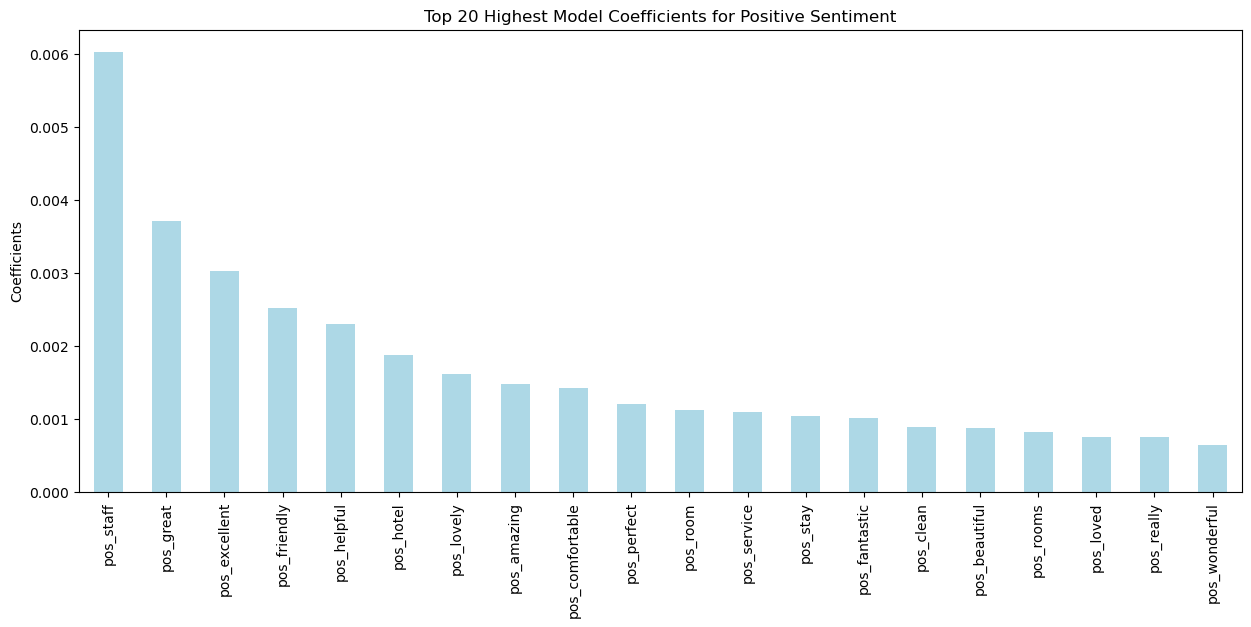

In [33]:
# Extracting the top 20 highest coefficients for positive sentiment
top_pos_coeffs = pd.Series(lr.coef_[0], index=model_test.columns).sort_values(ascending=False).filter(like='pos').head(20)

# Plotting the top 20 highest coefficients
top_pos_coeffs.plot(kind="bar", figsize=(15, 6), color=(0.678, 0.847, 0.902), legend=False)
plt.title("Top 20 Highest Model Coefficients for Positive Sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show() 

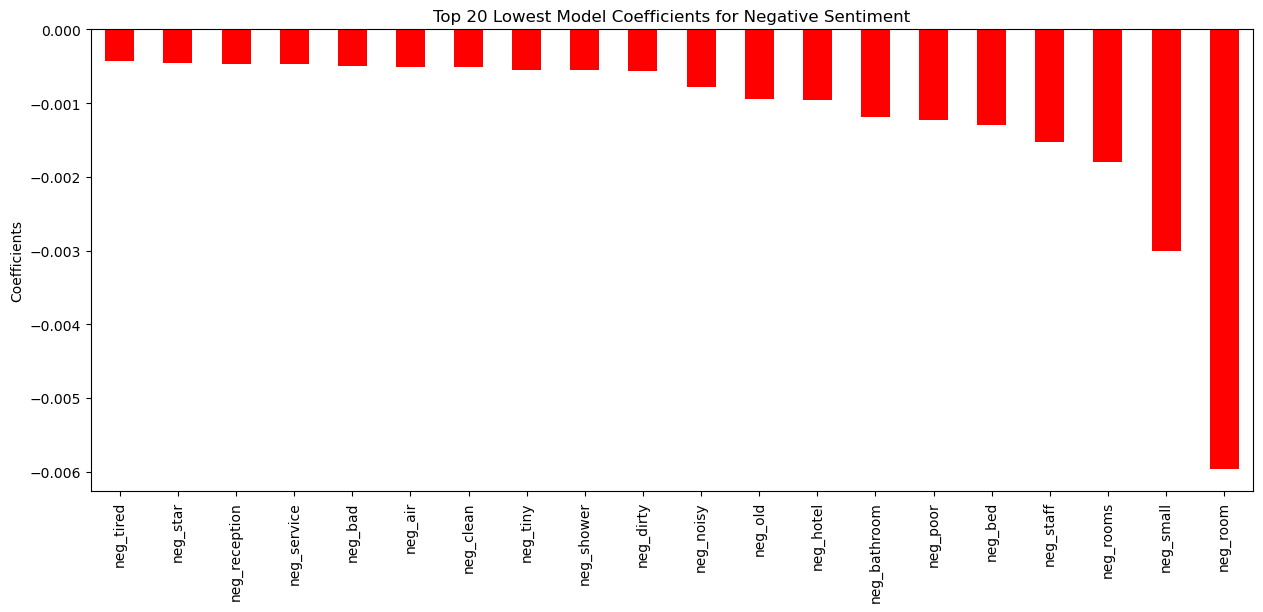

In [34]:
# Extracting the 20 lowest coefficients for negative sentiment
top_neg_coeffs = pd.Series(lr.coef_[0], index=model_test.columns).sort_values(ascending=False).filter(like='neg').tail(20)

# Plotting the 20 lowest coefficients
top_neg_coeffs.plot(kind="bar", figsize=(15, 6), color='red', legend=False)
plt.title("Top 20 Lowest Model Coefficients for Negative Sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

The bar charts analyze words from customer reviews that indicate positive and negative sentiments, using logistic regression. Words like "staff" and "great" have strong positive coefficients, meaning they're closely linked to positive reviews. Conversely, words like "room" and "tiny" have strong negative coefficients, signaling a connection to negative feedback. These insights suggest that excellent service is valued, while issues with rooms are common complaints. This information could guide businesses to improve service quality and address concerns about physical spaces.

To improve, businesses should focus on:

1. Enhancing cleanliness and updating facilities.
2. Training staff to be friendly and provide excellent service.
3. Using positive feedback in marketing.
4. Monitoring customer feedback for these specific issues.
5. Making targeted improvements rather than broad changes

### Pipeline, combine PCA with a decision tree classifier.

In [35]:
# Define a list of tuples containing the steps of the pipeline
estimators = [('normalise', StandardScaler()),  # Step 1: Normalize the data
              ('reduce_dim', PCA(n_components=20)),  # Step 2: Reduce dimensionality with PCA
              ('model', DecisionTreeClassifier())]  # Step 3: Train a decision tree model

# Create the pipeline
pipe = Pipeline(estimators)

# Define the grid of hyperparameters to search over
param_grid = [{'model__max_depth': [4, 6, 8, 16],  # Maximum depth of the decision tree
               'model__min_samples_leaf': [1, 5, 10, 20],  # Minimum number of samples required in a leaf node
               'model__min_samples_split': [2, 10, 50, 100]}]  # Minimum number of samples required to split an internal node

# Create a grid search object with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5, verbose=20, n_jobs=1, scoring="accuracy")

# Fit the grid search to the training data
fittedgrid = grid.fit(model_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5; 1/64] START model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2
[CV 1/5; 1/64] END model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2;, score=0.736 total time=  16.6s
[CV 2/5; 1/64] START model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2
[CV 2/5; 1/64] END model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2;, score=0.734 total time=  16.3s
[CV 3/5; 1/64] START model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2
[CV 3/5; 1/64] END model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2;, score=0.732 total time=  16.6s
[CV 4/5; 1/64] START model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2
[CV 4/5; 1/64] END model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2;, score=0.733 total time=  16.6s
[CV 5/5; 1/64] START model__max_depth=4, model__min_sa

#### My M1 Macbook Air Kept Running Out of Memory so I had to use Google Cloud with 4 cores and 64GB RAM To Run the Above and The Rest of the Code But Moving On - https://towardsdatascience.com/running-jupyter-notebook-in-google-cloud-platform-in-15-min-61e16da34d52 This Helped Alot

In [40]:
# Obtain the best estimator object from the grid search
best_estimator = fittedgrid.best_estimator_

# Obtain the best hyperparameters found during the grid search
best_params = fittedgrid.best_params_

# Calculate the score of the best estimator on the test data
test_score = fittedgrid.score(model_test, y_test)

# Print the best estimator, best hyperparameters, and test score with space in-between
print("Best Estimator:", fittedgrid.best_estimator_, "\n")
print("Best Hyperparameters:", fittedgrid.best_params_, "\n")
print("Test Score:", fittedgrid.score(model_test, y_test), "\n")

Best Estimator: Pipeline(steps=[('normalise', StandardScaler()),
                ('reduce_dim', PCA(n_components=20)),
                ('model', DecisionTreeClassifier(max_depth=8))]) 

Best Hyperparameters: {'model__max_depth': 8, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2} 

Test Score: 0.751958351107147 



For this decision tree, the best settings found were:

1. Max depth of 8: The tree can only make eight levels of decisions.
2. Min samples leaf of 1: Each end point (leaf) of the tree must have at least one data point.
3. Min samples split of 2: Each decision point in the tree needs at least two data points to make a further split.

The model's accuracy on new, unseen data is about 75.2%. This score means that the model correctly predicted the outcome for approximately 75.2% of the test dataset.

When comparing the scores between the Decision Tree model and Logistic Regression:

Logistic Regression had a training score of about 71.3% and a test score of about 71.0%.

Decision Tree had a test score of about 75.2%.

This shows that the Decision Tree model performed better than the Logistic Regression on the test dataset, with a higher accuracy score of 75.2% compared to 71.0% for Logistic Regression. 

This indicates that the Decision Tree model is more effective at correctly predicting outcomes on new, unseen data in this particular scenario.

### Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

,Predicted Positive,Predicted Negative
Actual Positive,30218,14232
Actual Negative,11353,47345


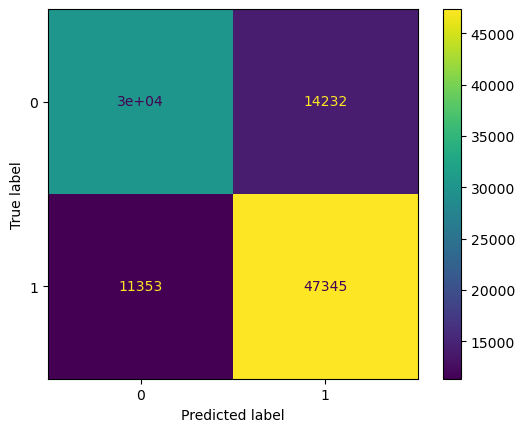

In [44]:
# Predict the classes on the test set
y_pred = fittedgrid.best_estimator_.predict(model_test)

# Compute the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix with labeled indices and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Positive", "Predicted Negative"],
    index=["Actual Positive", "Actual Negative"]
)

# Display the confusion matrix DataFrame
display(cf_df)

# Visualize the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(fittedgrid.best_estimator_, model_test, y_test)

#### Confusion Matrix Analysis


- True Positives (TP): The number of positive cases correctly predicted as positive by the model. Count: 30,218 


- False Negatives (FN): The number of positive cases incorrectly predicted as negative. Count: 14,232 


- False Positives (FP): The number of negative cases incorrectly predicted as positive. Count: 11,353 


- True Negatives (TN): The number of negative cases correctly predicted as negative. Count: 47,345 


Our Main Concern Should be False Postive and Negatives because they would mislead us. If we take the example of friendly staff False Positive would make us believe the Staff is Friendly when they are not and sames goes for the service our service could be great but false negative would show it as bad. So we would need to further refine the model to avoid these, as they can mislead us and cause harm to business